# Linear Regression (Tensorflow)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 设置seed
seed=123
np.random.seed(seed)
tf.random.set_seed(seed)

## Data: Inputs & Labels

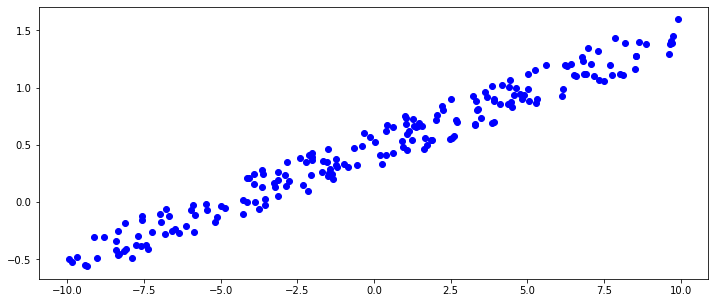

In [2]:
def generate_data(m=0.1, b=0.3, n=200):
    x = np.random.uniform(-10, 10, n)
    noise = np.random.uniform(0, 0.35, n)
    y = (m * x + b) + noise
    return x.astype(np.float32), y.astype(np.float32)

x, y = generate_data()
plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.scatter(x, y, c="b", label="samples")

## Linear Regression Model with Tensorflow

In [3]:
class LinearRegressionTFCustomize(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.w = tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))
        self.b = tf.Variable(tf.random.uniform([1], -0.1, 0.1))
        
    def __call__(self, x, training=False):
        return x * self.w + self.b

In [4]:
class LinearRegressionTFKeras(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.linear = tf.keras.layers.Dense(1, activation=None)
    
    def __call__(self, x, training=True):
        return self.linear(x)

### Train the Models
可是直接使用较为简单的 compile-fit 的训练模式，或者使用较为复杂但有更多可定制操作空间的训练方式

In [5]:
lr = 0.01
eps= 100

In [6]:
# Compile-fit
tf_compile_fit_model = LinearRegressionTFKeras()
tf_compile_fit_model.compile(optimizer=tf.optimizers.SGD(learning_rate=lr), loss='mean_squared_error')
tf_compile_fit_model.fit(x, y, epochs=eps, verbose=0)

In [7]:
# Train model with handcrafting training loop
tf_handcraft_model = LinearRegressionTFKeras()

optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

for epoch in range(eps):
    x_batch = tf.reshape(x, [200, 1])
    with tf.GradientTape() as tape:
        y_pred = tf_handcraft_model(x_batch)
        y_pred = tf.reshape(y_pred, [200])
        loss = tf.losses.mse(y_pred, y)
        
    grads = tape.gradient(loss, tf_handcraft_model.variables)
    
    optimizer.apply_gradients(grads_and_vars=zip(grads, tf_handcraft_model.variables))
    
    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}: Loss {loss.numpy()}")

Epoch 50: Loss 0.041742898523807526
Epoch 100: Loss 0.014755782671272755


## Results

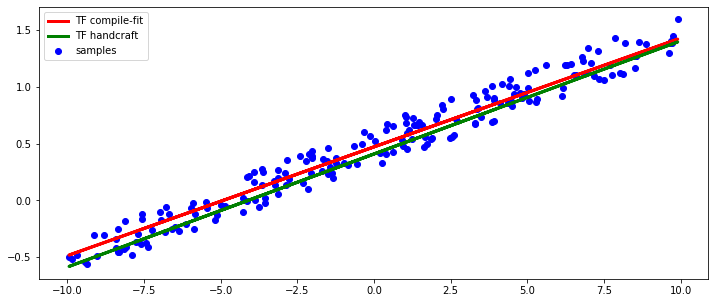

In [8]:
[w_tf, b_tf] = tf_compile_fit_model.trainable_variables
[w2_tf, b2_tf] = tf_handcraft_model.trainable_variables

w_tf = tf.reshape(w_tf, [1])
w2_tf = tf.reshape(w2_tf, [1])

plt.figure(figsize=(12, 5))
ax = plt.subplot(111)
ax.scatter(x, y, c="b", label="samples")
ax.plot(x, w_tf*x + b_tf, "r", linewidth=3.0, label="TF compile-fit")
ax.plot(x, w2_tf*x + b2_tf, "g", linewidth=3.0, label="TF handcraft")
ax.legend()
plt.xlabel="x"
plt.ylabel="y"